
<a id="100"></a>

# <center> WeCloudData Project</center>



## <center> Forecasting - WHO Flu Data</center>



 <center> <d>&#9650;</d> <d>&#9644;</d> <d>&#9644;</d> <d>&#9672;</d> <d>&#9644;</d> <d>&#9644;</d><d>&#9644;</d> <d>&#9672;</d> <d>&#9644;</d> <d>&#9644;</d> <d>&#9644;</d> <d>&#9672;</d><d>&#9644;</d> <d>&#9644;</d> <d>&#9644;</d> <d>&#9672;</d> <d>&#9644;</d> <d>&#9644;</d><d>&#9644;</d> <d>&#9672;</d> <d>&#9644;</d> <d>&#9644;</d> <d>&#9644;</d> <d>&#9672;</d><d>&#9644;</d> <d>&#9644;</d> <d>&#9644;</d> <d>&#9672;</d> <d>&#9644;</d> <d>&#9644;</d><d>&#9644;</d> <d>&#9650;</d> </center>

##     Contents

<d>&#9644;</d><d>&#9644;</d><d>&#9644;</d><d>&#9644;</d><d>&#9644;</d><d>&#9644;</d><d>&#9644;</d><d>&#9644;<d>&#9644;</d><d>&#9644;</d><d>&#9644;</d><d>&#9644;</d><d>&#9644;</d><d>&#9644;</d><d>&#9644;</d><d>&#9644;<d>&#9644;</d><d>&#9644;</d><d>&#9644;</d><d>&#9644;</d><d>&#9644;</d><d>&#9644;</d><d>&#9644;</d><d>&#9644;

###   <d>&#9638;</d> [1. Loading Data](#1)
###   <d>&#9638;</d> [2. Data Cleaning](#2)
###   <d>&#9638;</d> [3. Studying Data ](#3)
###   <d>&#9638;</d> [4. Basic Model - ARIMA / SARIMAX](#4)
###   <d>&#9638;</d> [5. Model Tuning ](#5)
###   <d>&#9638;</d> [6. Model Metrics](#6)
###   <d>&#9638;</d> [7. Re-evaluating with Controlled Dataset](#7)
###   <d>&#9638;</d> [8. Conclusion](#8)
    
<d>&#9644;</d><d>&#9644;</d><d>&#9644;</d><d>&#9644;</d><d>&#9644;</d><d>&#9644;</d><d>&#9644;</d><d>&#9644;<d>&#9644;</d><d>&#9644;</d><d>&#9644;</d><d>&#9644;</d><d>&#9644;</d><d>&#9644;</d><d>&#9644;</d><d>&#9644;<d>&#9644;</d><d>&#9644;</d><d>&#9644;</d><d>&#9644;</d><d>&#9644;</d><d>&#9644;</d><d>&#9644;</d><d>&#9644;   

### Imports

In [240]:
import pandas as pd
import numpy as np
import re

# visualiation libraries
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
import seaborn as sns

# Warnings
import warnings
warnings.filterwarnings('ignore')

# Stat Models
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm
import pmdarima as pm
from statsmodels.tsa.stattools import adfuller

from pandas.tseries.offsets import DateOffset

<a id="1"></a>
## Loading Data

[Back to Top](#100)

In [53]:
dfx = pd.read_excel('FluData-2010-2023.xlsx')

In [219]:
df = dfx # data reset without loading

In [220]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109083 entries, 0 to 109082
Data columns (total 23 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   WHOREGION               109083 non-null  object 
 1   ITZ                     109083 non-null  object 
 2   COUNTRY/AREA/TERRITORY  109083 non-null  object 
 3   COUNTRY_CODE            109083 non-null  object 
 4   ORIGIN_SOURCE           109083 non-null  object 
 5   ISO_YEAR                109083 non-null  int64  
 6   ISO_WEEK                109083 non-null  int64  
 7   ISO_SDATE               109083 non-null  object 
 8   SPEC_RECEIVED_NB        42855 non-null   float64
 9   SPEC_PROCESSED_NB       107760 non-null  float64
 10  AH1                     77189 non-null   float64
 11  AH1N12009               100162 non-null  float64
 12  AH3                     100001 non-null  float64
 13  AH5                     37120 non-null   float64
 14  ANOTSUBTYPED        

### Data Contains many unwanted columns. For the purposes of this assignment, we only need Date and Positive Cases.

<a id="2"></a>
## Data Cleaning

[Back to Top](#100)

In [221]:
df = df.drop(columns = ['ISO_WEEK', 'SPEC_RECEIVED_NB', 'SPEC_PROCESSED_NB','AH1','AH1N12009','AH3', \
                        'AH5', 'INF_A', 'ANOTSUBTYPED', 'BVIC', 'BYAM', 'BNOTDETERMINED', 'INF_B', \
                        'INF_NEGATIVE', 'ILI_ACTIVITY', 'WHOREGION', 'ITZ', 'COUNTRY/AREA/TERRITORY', \
                        'COUNTRY_CODE','ORIGIN_SOURCE','ISO_YEAR']) # Dropping all other columns

In [222]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109083 entries, 0 to 109082
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   ISO_SDATE  109083 non-null  object 
 1   INF_ALL    103521 non-null  float64
dtypes: float64(1), object(1)
memory usage: 1.7+ MB


In [223]:
df['ISO_SDATE'] = pd.to_datetime(df['ISO_SDATE']) # Converting column to datetime dtype

In [224]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109083 entries, 0 to 109082
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype              
---  ------     --------------   -----              
 0   ISO_SDATE  109083 non-null  datetime64[ns, UTC]
 1   INF_ALL    103521 non-null  float64            
dtypes: datetime64[ns, UTC](1), float64(1)
memory usage: 1.7 MB


In [225]:
df.rename(columns = {'ISO_SDATE':'Date', 'INF_ALL':'Positive'}, inplace = True) # Renaming columns for ease of coding.

In [226]:
df.set_index('Date', inplace=True) # Setting Date column as the index

In [227]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 109083 entries, 2010-12-05 18:30:00+00:00 to 2022-12-18 18:30:00+00:00
Data columns (total 1 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Positive  103521 non-null  float64
dtypes: float64(1)
memory usage: 1.7 MB


In [228]:
df = df.groupby('Date').sum() # Grouping by date to remove any duplicates and to sum all Positive cases by date.

In [229]:
df

,Positive
Date,
2010-12-05 18:30:00+00:00,3699.0
2010-12-12 18:30:00+00:00,5755.0
2010-12-19 18:30:00+00:00,9384.0
2010-12-26 18:30:00+00:00,11594.0
2011-01-02 18:30:00+00:00,15185.0
...,...
2023-02-19 18:30:00+00:00,22182.0
2023-02-26 18:30:00+00:00,26037.0
2023-03-05 18:30:00+00:00,26097.0


###  Considering Flu is a seasonal illness, the basic assumption is that the data will reflect seasonality. 

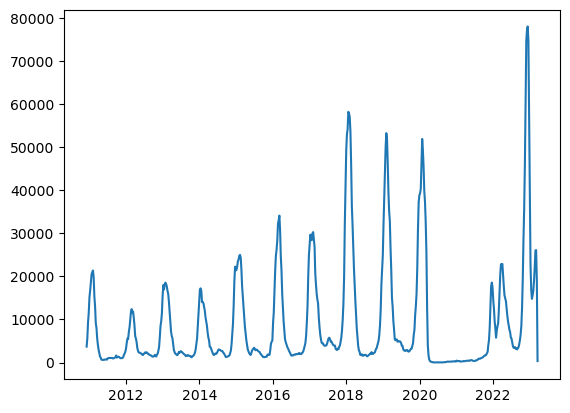

In [217]:
plt.plot(df.index, df['Positive'])

<a id="3"></a>
## Studying Data (Seasonal, Stationary, AutoCorrelation)

[Back to Top](#100)

###  The trend looks seasonal till 2020. But the years 2020-2023 do not follow the same trend. This can be checked by the Augmented Dickey-Fuller test. 

#### The Augmented Dickey-Fuller (ADF) test is a statistical test used to determine if a time series is stationary or non-stationary. A non-seasonal time series is one where there is no consistent pattern of change in the data over time, while a seasonal time series is one where there is a pattern that repeats at regular intervals. Since there is a 'flu season' The data should be seasonal. This needs to be evaluated.

In [230]:
values = df.values
 
# passing the extracted passengers count to adfuller function.
# result of adfuller function is stored in a res variable
res = adfuller(values)
 
# Printing the statistical result of the adfuller test
print('Augmneted Dickey_fuller Statistic: %f' % res[0])
print('p-value: %f' % res[1])
 
# printing the critical values at different alpha levels.
print('critical values at different levels:')
for k, v in res[4].items():
    print('\t%s: %.3f' % (k, v))

Augmneted Dickey_fuller Statistic: -7.814637
p-value: 0.000000
critical values at different levels:
	1%: -3.441
	5%: -2.866
	10%: -2.569


###  The ADF value is lower than the critical values and the p value is lower than 0.05. This means the dataset is stationary and non seasonal

In [232]:
df1 = df[df.index<'2020-03-08']

In [233]:
df1

,Positive
Date,
2010-12-05 18:30:00+00:00,3699.0
2010-12-12 18:30:00+00:00,5755.0
2010-12-19 18:30:00+00:00,9384.0
2010-12-26 18:30:00+00:00,11594.0
2011-01-02 18:30:00+00:00,15185.0
...,...
2020-02-02 18:30:00+00:00,49311.0
2020-02-09 18:30:00+00:00,45425.0
2020-02-16 18:30:00+00:00,39759.0


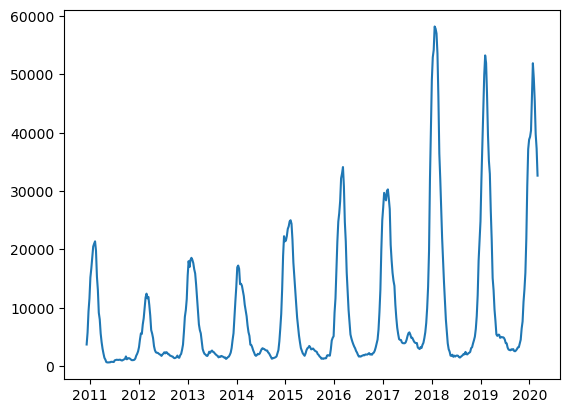

In [246]:
plt.plot(df1.index, df1['Positive'])

In [234]:
values = df1.values
 
# passing the extracted passengers count to adfuller function.
# result of adfuller function is stored in a res variable
res = adfuller(values)
 
# Printing the statistical result of the adfuller test
print('Augmneted Dickey_fuller Statistic: %f' % res[0])
print('p-value: %f' % res[1])
 
# printing the critical values at different alpha levels.
print('critical values at different levels:')
for k, v in res[4].items():
    print('\t%s: %.3f' % (k, v))

Augmneted Dickey_fuller Statistic: -5.234140
p-value: 0.000007
critical values at different levels:
	1%: -3.444
	5%: -2.868
	10%: -2.570


##### The ADF test statistic value of -7.814637 and the p-value of 0.000000 with full dataset and -5.234140 and the p-value of 0.000007 with the controlled dataset both suggest that the null hypothesis of the test (which states that the time series has a unit root and is non-stationary) can be rejected at any reasonable significance level. Therefore, the time series is stationary.

##### However, the ADF test does not directly provide information on the seasonality of the time series. Therefore, to determine whether the time series is seasonal or not, it is recommended to examine other diagnostic plots such as the autocorrelation function (ACF) and partial autocorrelation function (PACF) plots. The presence of significant peaks at regular intervals in the ACF and PACF plots would indicate the presence of seasonality in the time series.

### As seen above, the data remains stationary even after removing data from 2020 - 2023 which looked non-seasonal. 

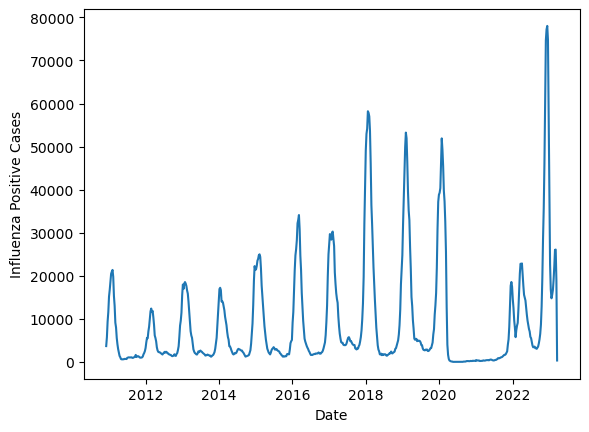

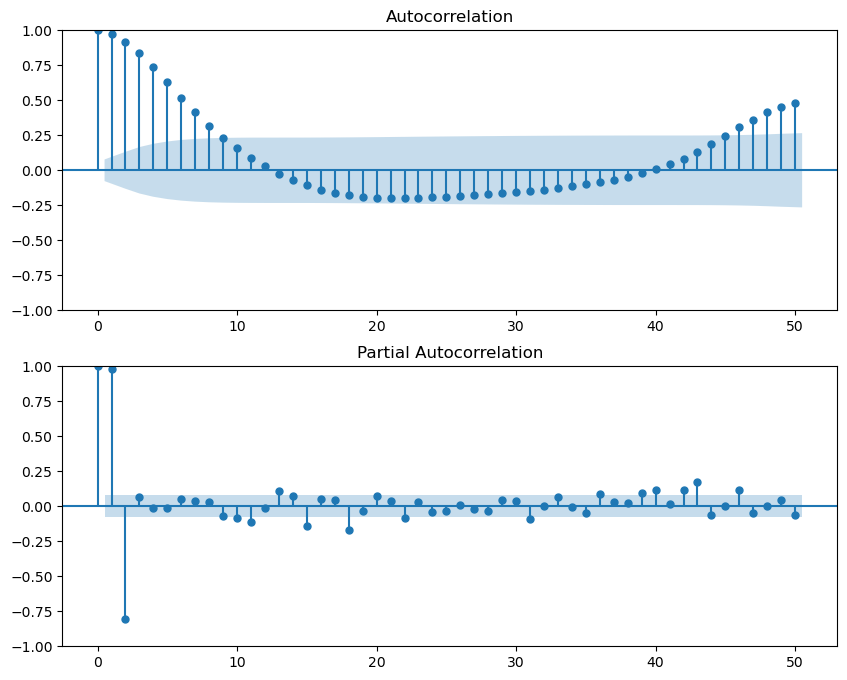

In [263]:
# Plot the time series
plt.plot(df.index, df['Positive'])
plt.xlabel('Date')
plt.ylabel('Influenza Positive Cases')
plt.show()

# Plot the autocorrelation and partial autocorrelation functions
fig, ax = plt.subplots(2,1,figsize=(10,8))
sm.graphics.tsa.plot_acf(df['Positive'], lags=50, ax=ax[0])
sm.graphics.tsa.plot_pacf(df['Positive'], lags=50, ax=ax[1])
plt.show()


##### The above ACF and PACF plots can be used to then identify the Ideal order and seasonal order for the ARIMA or SARIMA models. But due to time constraints for this assignment and unfamiliartity with the process, we used an auto tuning measure later. The first models just used 1,1,1 order. The seasonal order used iniitially was 1,1,1,52 due to the data being weekly

<a id="4"></a>
## Basic Models

[Back to Top](#100)

##### ARIMA stands for Autoregressive Integrated Moving Average, which is a time series forecasting method that models the dependence between an observation and a linear combination of past observations and past errors. ARIMA models are used for time series data that is not stationary, which means that the mean, variance, or other statistical properties of the data change over time.

##### SARIMAX stands for Seasonal Autoregressive Integrated Moving Average with Exogenous Variables. It is a statistical model used for time series forecasting, which extends the popular ARIMA (Autoregressive Integrated Moving Average) model by allowing the inclusion of additional external variables or factors that may influence the outcome being forecasted.

##### The ARIMA with seasonal order and SARIMAX are both time series models that can be used to analyze and forecast seasonal data.

##### The main difference between the two models is that the ARIMA with seasonal order is designed specifically for time series data that exhibit seasonal patterns, whereas the SARIMAX can handle both non-seasonal and seasonal time series data with additional external factors.

##### In the context of the Flu Occurrence dataset, which has clear seasonality, the ARIMA with seasonal order would be an appropriate choice for modeling and forecasting. This model would take into account the seasonal component of the data and can be written as ARIMA(p,d,q)(P,D,Q)m, where the capital letters P, D, and Q denote the seasonal order of the autoregressive, differencing, and moving average terms, respectively, and m is the number of time periods in the seasonal cycle.

##### On the other hand, SARIMAX would allow for the inclusion of external factors, such as weather conditions, vaccination rates, or other factors that might influence the occurrence of the flu. This additional flexibility could be useful in situations where the seasonal component of the data is not the only factor affecting the outcome.

##### In summary, if the Flu Occurrence dataset has only a clear seasonal pattern, then ARIMA with seasonal order would be sufficient. However, if there are additional external factors that could influence the outcome, then SARIMAX could be a more appropriate choice. It is always recommended to try multiple models and compare their performance to determine the best approach.

##### Therefore, while ARIMA with seasonal order and SARIMA may look similar in their parameter notation, they differ in the scope of the models. ARIMA with seasonal order only models seasonal behavior, while SARIMA models both seasonal and non-seasonal behavior in time series data.

##### Below we have tried out ARIMA, ARIMA with Seasonal Order and SARIMAX for the evaluation. This notebook explores all models and chooses a SARIMAX model with tuned parameters in the end. This was done as an external parameter could further be added. 


#### ARIMA

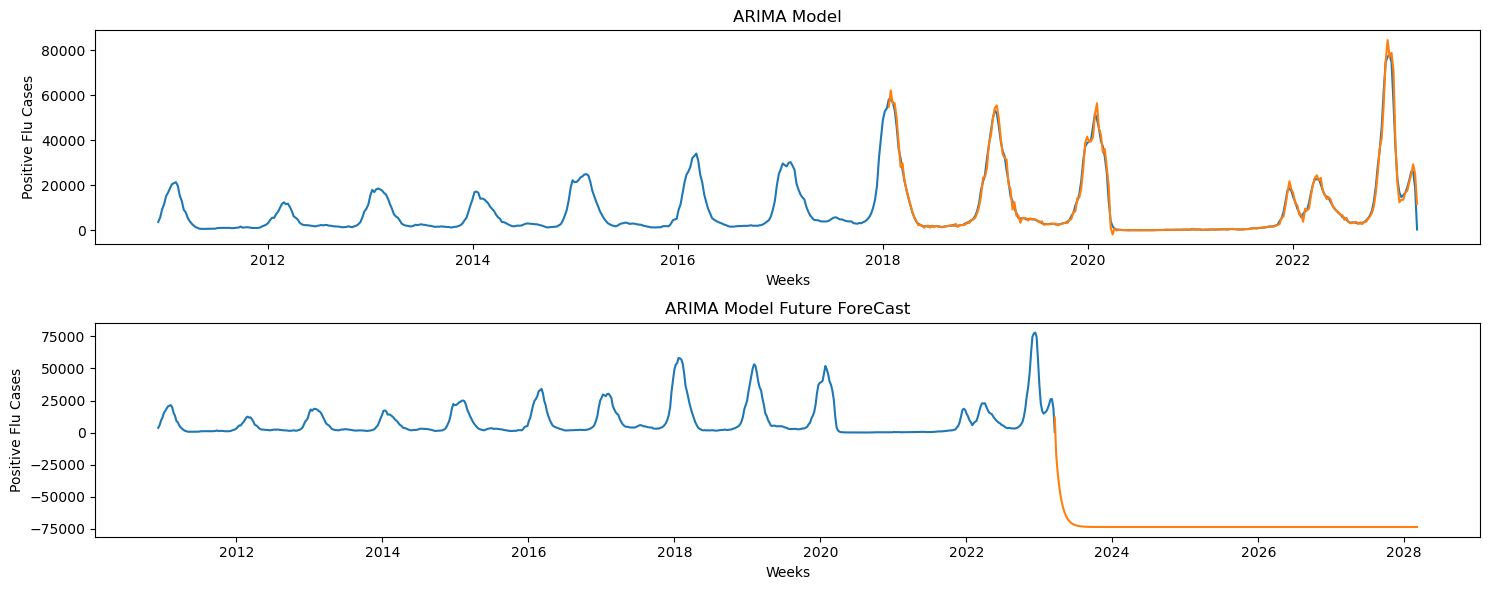

In [261]:
model = ARIMA(df['Positive'], order=(1,1,1))
results = model.fit()
forecast = results.predict(start='2018-01-21 18:30:00+00:00', end='2023-03-19 18:30:00+00:00')
# plt.plot(df['Positive'])
# plt.plot(forecast)
# plt.show()
pl11 = df['Positive']
pl12 = forecast

# Creating a future dataset and testing
future_dates = [df.index[-1] + DateOffset(weeks=x) for x in range(0, 260)]
future_datest_df = pd.DataFrame(index = future_dates[1:], columns = df.columns)
fdf = pd.concat([df,future_datest_df])
fdf['Forecast'] = results.predict(start='2023-03-19 18:30:00+00:00', end='2028-03-05 18:30:00+00:00')
pl21 = fdf[['Positive','Forecast']]
# fdf[['Positive','Forecast']].plot(figsize = (12,8))


fig, axs = plt.subplots(2,1, figsize = (15,6))
axs[0].plot(pl11)
axs[0].plot(pl12)
axs[0].set_title('ARIMA Model')
axs[0].set_xlabel('Weeks')
axs[0].set_ylabel('Positive Flu Cases')

axs[1].plot(pl21)
axs[1].set_title('ARIMA Model Future ForeCast')
axs[1].set_xlabel('Weeks')
axs[1].set_ylabel('Positive Flu Cases')

fig.tight_layout()

#### ARIMA Seasonal Ordered

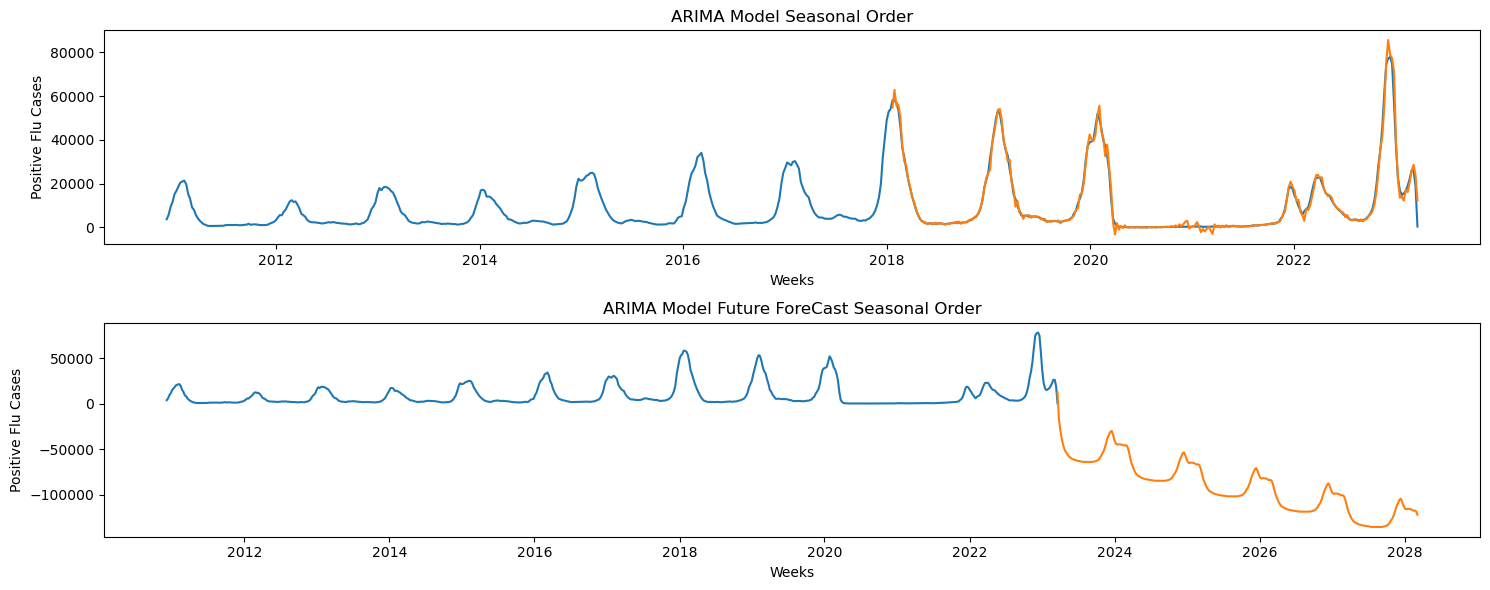

In [262]:
model = ARIMA(df['Positive'], order=(1,1,1), seasonal_order=(1,1,1,52))
results = model.fit()
forecast = results.predict(start='2018-01-21 18:30:00+00:00', end='2023-03-19 18:30:00+00:00')
# plt.plot(df['Positive'])
# plt.plot(forecast)
# plt.show()
pl11 = df['Positive']
pl12 = forecast

# Creating a future dataset and testing
future_dates = [df.index[-1] + DateOffset(weeks=x) for x in range(0, 260)]
future_datest_df = pd.DataFrame(index = future_dates[1:], columns = df.columns)
fdf = pd.concat([df,future_datest_df])
fdf['Forecast'] = results.predict(start='2023-03-19 18:30:00+00:00', end='2028-03-05 18:30:00+00:00')
pl21 = fdf[['Positive','Forecast']]
# fdf[['Positive','Forecast']].plot(figsize = (12,8))


fig, axs = plt.subplots(2,1, figsize = (15,6))
axs[0].plot(pl11)
axs[0].plot(pl12)
axs[0].set_title('ARIMA Model Seasonal Order')
axs[0].set_xlabel('Weeks')
axs[0].set_ylabel('Positive Flu Cases')

axs[1].plot(pl21)
axs[1].set_title('ARIMA Model Future ForeCast Seasonal Order')
axs[1].set_xlabel('Weeks')
axs[1].set_ylabel('Positive Flu Cases')

fig.tight_layout()

As Seen in graphs above an ARIMA model might not work best for this dataset. 

### A Basic Sarimax model is now run to see if it fits better. 

In [264]:
# Sarima Model
model = sm.tsa.statespace.SARIMAX(df, order=(1,1,1), seasonal_order=(1,1,1,52))

# Fit the model to the data
results = model.fit()

# Print the model summary
print(results.summary())

                                     SARIMAX Results                                      
Dep. Variable:                           Positive   No. Observations:                  642
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 52)   Log Likelihood               -5185.273
Date:                            Fri, 31 Mar 2023   AIC                          10380.547
Time:                                    03:30:48   BIC                          10402.439
Sample:                                12-05-2010   HQIC                         10389.076
                                     - 03-19-2023                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7092      0.021     33.397      0.000       0.668       0.751
ma.L1          0.2778      0.033   

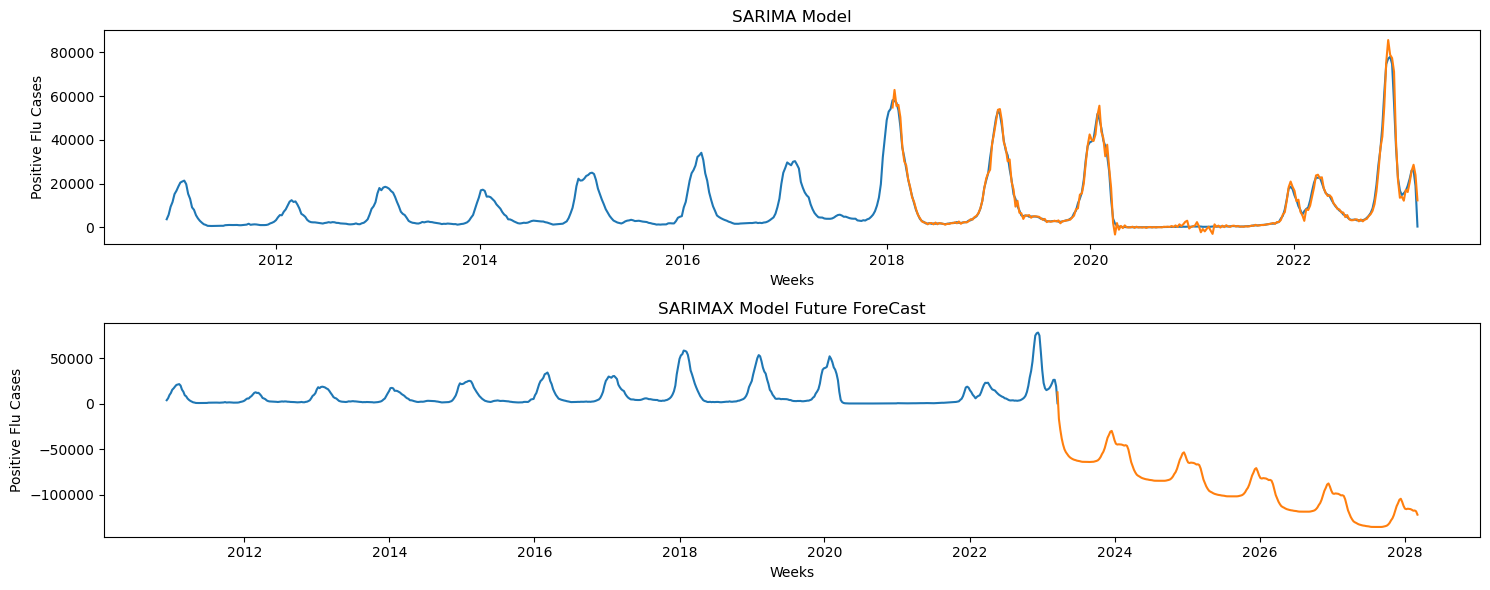

In [266]:
forecast = results.predict(start='2018-01-21 18:30:00+00:00', end='2023-03-19 18:30:00+00:00')
# plt.plot(df['Positive'])
# plt.plot(forecast)
# plt.show()
pl11 = df['Positive']
pl12 = forecast

# Creating a future dataset and testing
future_dates = [df.index[-1] + DateOffset(weeks=x) for x in range(0, 260)]
future_datest_df = pd.DataFrame(index = future_dates[1:], columns = df.columns)
fdf = pd.concat([df,future_datest_df])
fdf['Forecast'] = results.predict(start='2023-03-19 18:30:00+00:00', end='2028-03-05 18:30:00+00:00')
pl21 = fdf[['Positive','Forecast']]
# fdf[['Positive','Forecast']].plot(figsize = (12,8))


fig, axs = plt.subplots(2,1, figsize = (15,6))
axs[0].plot(pl11)
axs[0].plot(pl12)
axs[0].set_title('SARIMA Model')
axs[0].set_xlabel('Weeks')
axs[0].set_ylabel('Positive Flu Cases')

axs[1].plot(pl21)
axs[1].set_title('SARIMAX Model Future ForeCast')
axs[1].set_xlabel('Weeks')
axs[1].set_ylabel('Positive Flu Cases')

fig.tight_layout()

### Not Much difference is observed to the ARIMA Model. 

<a id="5"></a>
## Model Tuning

[Back to Top](#100)

### A Model is Tuned using ranges 1 to 5 for the order.

In [268]:
# Model Tuning using AutoArima
tunedmodel = pm.auto_arima(df, start_p=1, start_q=1, max_p=5, max_q=5, m=52, seasonal=True, d=None, 
                      trace=True, error_action='ignore', suppress_warnings=True, stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(1,0,1)[52] intercept   : AIC=11222.623, Time=1.88 sec
 ARIMA(0,1,0)(0,0,0)[52] intercept   : AIC=11985.915, Time=0.04 sec
 ARIMA(1,1,0)(1,0,0)[52] intercept   : AIC=11267.792, Time=1.07 sec
 ARIMA(0,1,1)(0,0,1)[52] intercept   : AIC=11476.258, Time=2.69 sec
 ARIMA(0,1,0)(0,0,0)[52]             : AIC=11983.918, Time=0.04 sec
 ARIMA(1,1,1)(0,0,1)[52] intercept   : AIC=11230.989, Time=1.23 sec
 ARIMA(1,1,1)(1,0,0)[52] intercept   : AIC=11227.098, Time=1.40 sec
 ARIMA(1,1,1)(2,0,1)[52] intercept   : AIC=11224.556, Time=12.22 sec
 ARIMA(1,1,1)(1,0,2)[52] intercept   : AIC=11224.520, Time=13.70 sec
 ARIMA(1,1,1)(0,0,0)[52] intercept   : AIC=11248.671, Time=0.14 sec
 ARIMA(1,1,1)(0,0,2)[52] intercept   : AIC=11229.668, Time=9.06 sec
 ARIMA(1,1,1)(2,0,0)[52] intercept   : AIC=11225.542, Time=11.90 sec
 ARIMA(1,1,1)(2,0,2)[52] intercept   : AIC=11225.994, Time=26.58 sec
 ARIMA(0,1,1)(1,0,1)[52] intercept   : AIC=11453.018, Time=6.05 sec
 

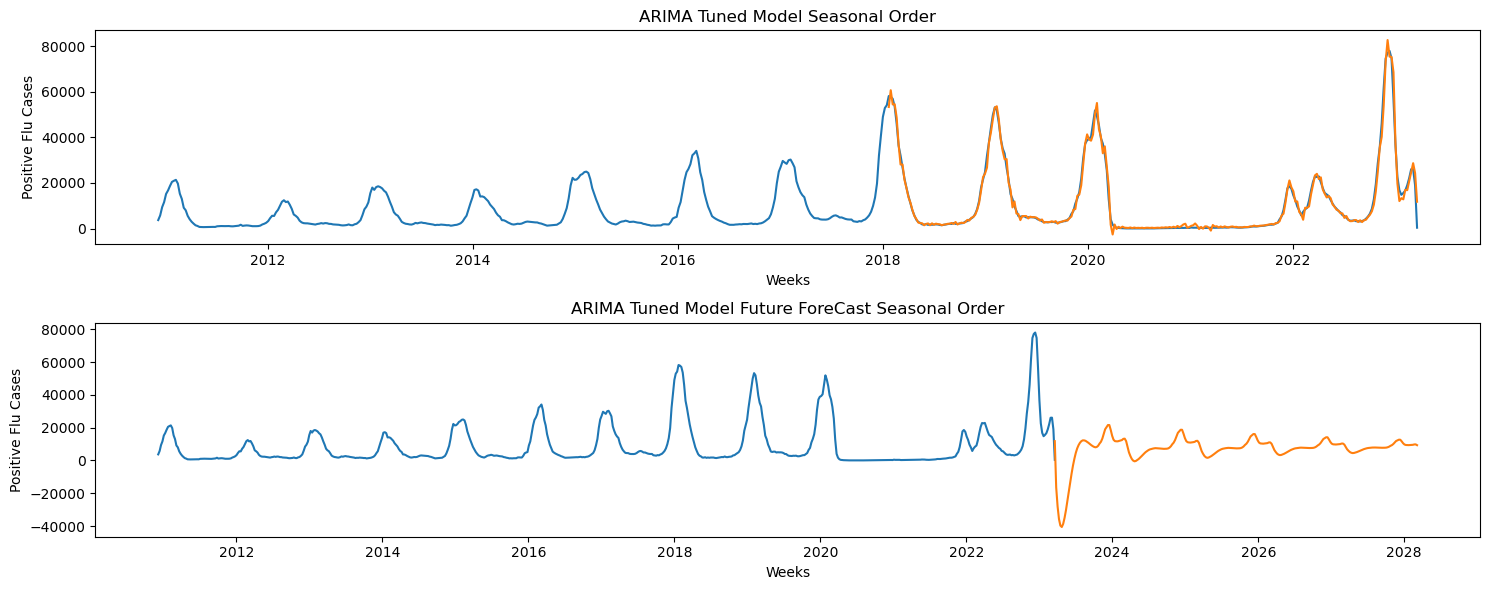

In [269]:
# fit an ARIMA model using the optimal order parameters
model = ARIMA(df, order=tunedmodel.order, seasonal_order=tunedmodel.seasonal_order)
results = model.fit()
forecast = results.predict(start='2018-01-21 18:30:00+00:00', end='2023-03-19 18:30:00+00:00')
# plt.plot(df['Positive'])
# plt.plot(forecast)
# plt.show()
pl11 = df['Positive']
pl12 = forecast

# Creating a future dataset and testing
future_dates = [df.index[-1] + DateOffset(weeks=x) for x in range(0, 260)]
future_datest_df = pd.DataFrame(index = future_dates[1:], columns = df.columns)
fdf = pd.concat([df,future_datest_df])
fdf['Forecast'] = results.predict(start='2023-03-19 18:30:00+00:00', end='2028-03-05 18:30:00+00:00')
pl21 = fdf[['Positive','Forecast']]
# fdf[['Positive','Forecast']].plot(figsize = (12,8))


fig, axs = plt.subplots(2,1, figsize = (15,6))
axs[0].plot(pl11)
axs[0].plot(pl12)
axs[0].set_title('ARIMA Tuned Model Seasonal Order')
axs[0].set_xlabel('Weeks')
axs[0].set_ylabel('Positive Flu Cases')

axs[1].plot(pl21)
axs[1].set_title('ARIMA Tuned Model Future ForeCast Seasonal Order')
axs[1].set_xlabel('Weeks')
axs[1].set_ylabel('Positive Flu Cases')

fig.tight_layout()

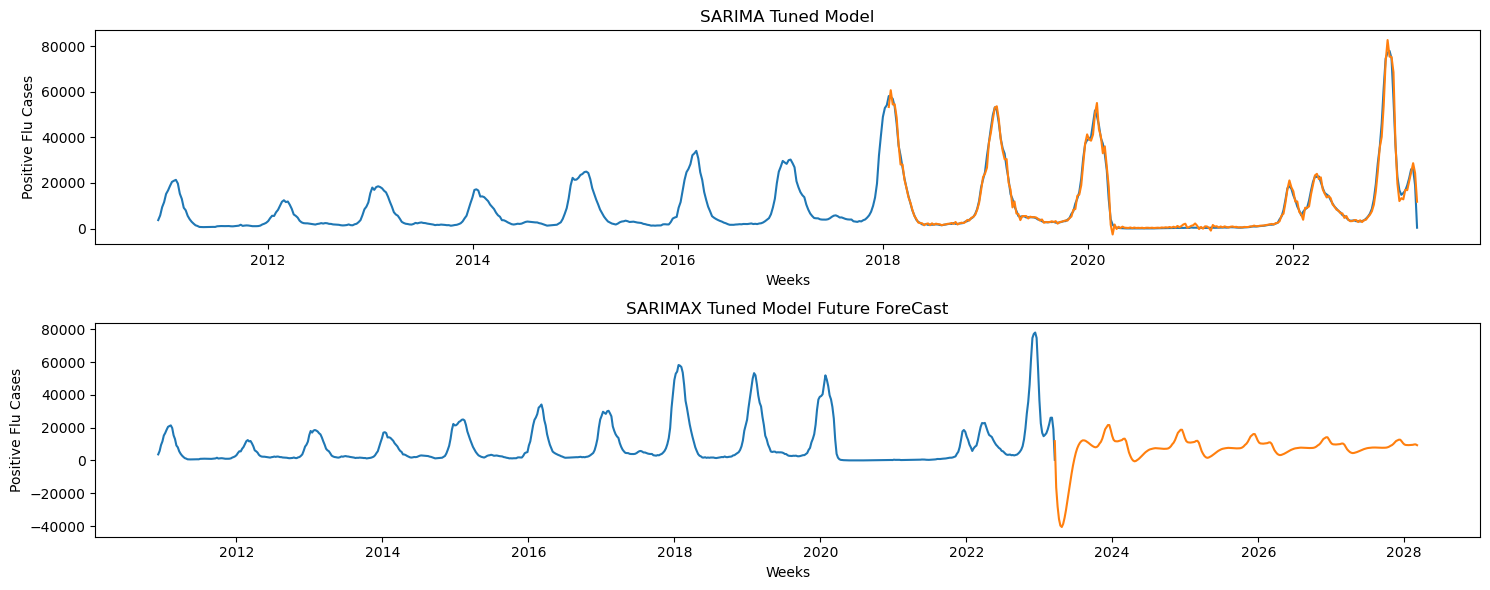

In [270]:
# fit a SARIMAX model using the optimal order parameters
model = sm.tsa.statespace.SARIMAX(df, order=tunedmodel.order, seasonal_order=tunedmodel.seasonal_order)
results = model.fit()
forecast = results.predict(start='2018-01-21 18:30:00+00:00', end='2023-03-19 18:30:00+00:00')
# plt.plot(df['Positive'])
# plt.plot(forecast)
# plt.show()
pl11 = df['Positive']
pl12 = forecast

# Creating a future dataset and testing
future_dates = [df.index[-1] + DateOffset(weeks=x) for x in range(0, 260)]
future_datest_df = pd.DataFrame(index = future_dates[1:], columns = df.columns)
fdf = pd.concat([df,future_datest_df])
fdf['Forecast'] = results.predict(start='2023-03-19 18:30:00+00:00', end='2028-03-05 18:30:00+00:00')
pl21 = fdf[['Positive','Forecast']]
# fdf[['Positive','Forecast']].plot(figsize = (12,8))


fig, axs = plt.subplots(2,1, figsize = (15,6))
axs[0].plot(pl11)
axs[0].plot(pl12)
axs[0].set_title('SARIMA Tuned Model')
axs[0].set_xlabel('Weeks')
axs[0].set_ylabel('Positive Flu Cases')

axs[1].plot(pl21)
axs[1].set_title('SARIMAX Tuned Model Future ForeCast')
axs[1].set_xlabel('Weeks')
axs[1].set_ylabel('Positive Flu Cases')

fig.tight_layout()

### A Seasonal Ordered ARIMA model seems to work the best after tuning and is similar to SARIMAX. But this still runs a model that's giving negative values. 

<a id="6"></a>
## Model Metrics

[Back to Top](#100)

### Below We Also Calculate the Metrics for both models

In [275]:
from sklearn.metrics import mean_squared_error

# Assume 'df' is the original DataFrame with the time series data and 'forecast' is the predicted values of the test set.
test_start_date = '2018-01-21 18:30:00+00:00'
test_end_date = '2023-03-19 18:30:00+00:00'

# Split the original data into train and test sets
train_data = df.loc[:test_start_date]
test_data = df.loc[test_start_date:test_end_date]

# Create the ARIMA model using the tuned model orders
model = ARIMA(train_data, order=tunedmodel.order, seasonal_order=tunedmodel.seasonal_order)

# Fit the ARIMA model on the training data
results = model.fit()

# Generate the forecast for the test set
forecast = results.predict(start=test_start_date, end=test_end_date)

# Calculate the mean squared error of the forecasted values compared to the actual test set values
mse = mean_squared_error(test_data['Positive'], forecast)
# Calculate the root mean squared error (RMSE) of the forecasted values compared to the actual test set values
rmse = np.sqrt(mean_squared_error(test_data['Positive'], forecast))
# Calculate the mean absolute percentage error (MAPE) of the forecasted values compared to the actual test set values
mape = np.mean(np.abs((test_data['Positive'] - forecast) / test_data['Positive'])) * 100
# Calculate the root mean squared log error (RMSLE) of the forecasted values compared to the actual test set values
rmsle = np.sqrt(np.mean((np.log(forecast + 1) - np.log(test_data['Positive'] + 1))**2))

print("Mean Squared Error (MSE) of the ARIMA model on test data:", mse)
print("Root Mean Squared Error (RMSE) of the ARIMA model on test data:", rmse)
print("Mean Absolute Percentage Error (MAPE) of the ARIMA model on test data:", mape)
print("Root Mean Squared Log Error (RMSLE) of the ARIMA model on test data:", rmsle)

Mean Squared Error (MSE) of the ARIMA model on test data: 4367233722.283851
Root Mean Squared Error (RMSE) of the ARIMA model on test data: 66085.04915851883
Mean Absolute Percentage Error (MAPE) of the ARIMA model on test data: 17826.539744521637
Root Mean Squared Log Error (RMSLE) of the ARIMA model on test data: 3.7502745233284855


In [277]:
from sklearn.metrics import mean_squared_error

# Assume 'df' is the original DataFrame with the time series data and 'forecast' is the predicted values of the test set.
test_start_date = '2018-01-21 18:30:00+00:00'
test_end_date = '2023-03-19 18:30:00+00:00'

# Split the original data into train and test sets
train_data = df.loc[:test_start_date]
test_data = df.loc[test_start_date:test_end_date]

# Create the ARIMA model using the tuned model orders
model = sm.tsa.statespace.SARIMAX(df, order=tunedmodel.order, seasonal_order=tunedmodel.seasonal_order)

# Fit the ARIMA model on the training data
results = model.fit()

# Generate the forecast for the test set
forecast = results.predict(start=test_start_date, end=test_end_date)

# Calculate the mean squared error of the forecasted values compared to the actual test set values
mse = mean_squared_error(test_data['Positive'], forecast)
# Calculate the root mean squared error (RMSE) of the forecasted values compared to the actual test set values
rmse = np.sqrt(mean_squared_error(test_data['Positive'], forecast))
# Calculate the mean absolute percentage error (MAPE) of the forecasted values compared to the actual test set values
mape = np.mean(np.abs((test_data['Positive'] - forecast) / test_data['Positive'])) * 100
# Calculate the root mean squared log error (RMSLE) of the forecasted values compared to the actual test set values
rmsle = np.sqrt(np.mean((np.log(forecast + 1) - np.log(test_data['Positive'] + 1))**2))

print("Mean Squared Error (MSE) of the SARIMAX model on test data:", mse)
print("Root Mean Squared Error (RMSE) of the SARIMAX model on test data:", rmse)
print("Mean Absolute Percentage Error (MAPE) of the SARIMAX model on test data:", mape)
print("Root Mean Squared Log Error (RMSLE) of the SARIMAX model on test data:", rmsle)

Mean Squared Error (MSE) of the SARIMAX model on test data: 3578992.88999852
Root Mean Squared Error (RMSE) of the SARIMAX model on test data: 1891.8226370351213
Mean Absolute Percentage Error (MAPE) of the SARIMAX model on test data: 91.19973341438975
Root Mean Squared Log Error (RMSLE) of the SARIMAX model on test data: 0.6857359815371898


<a id="7"></a>
## Re-evaluating with Controlled Dataset

[Back to Top](#100)

### The Dataset till 2020 is now chosen to try out all the above excercises. 

In [278]:
df = df1

In [284]:
df

,Positive
Date,
2010-12-05 18:30:00+00:00,3699.0
2010-12-12 18:30:00+00:00,5755.0
2010-12-19 18:30:00+00:00,9384.0
2010-12-26 18:30:00+00:00,11594.0
2011-01-02 18:30:00+00:00,15185.0
...,...
2020-02-02 18:30:00+00:00,49311.0
2020-02-09 18:30:00+00:00,45425.0
2020-02-16 18:30:00+00:00,39759.0


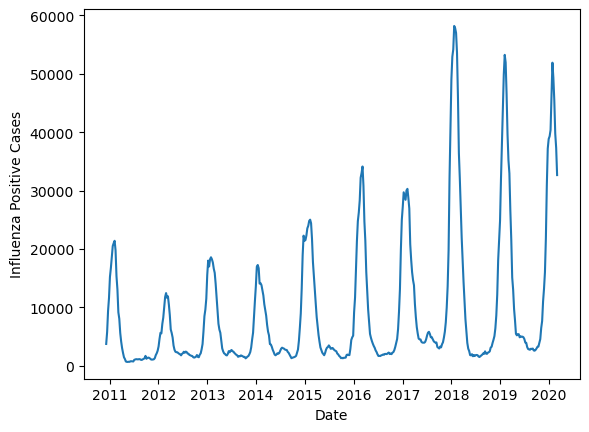

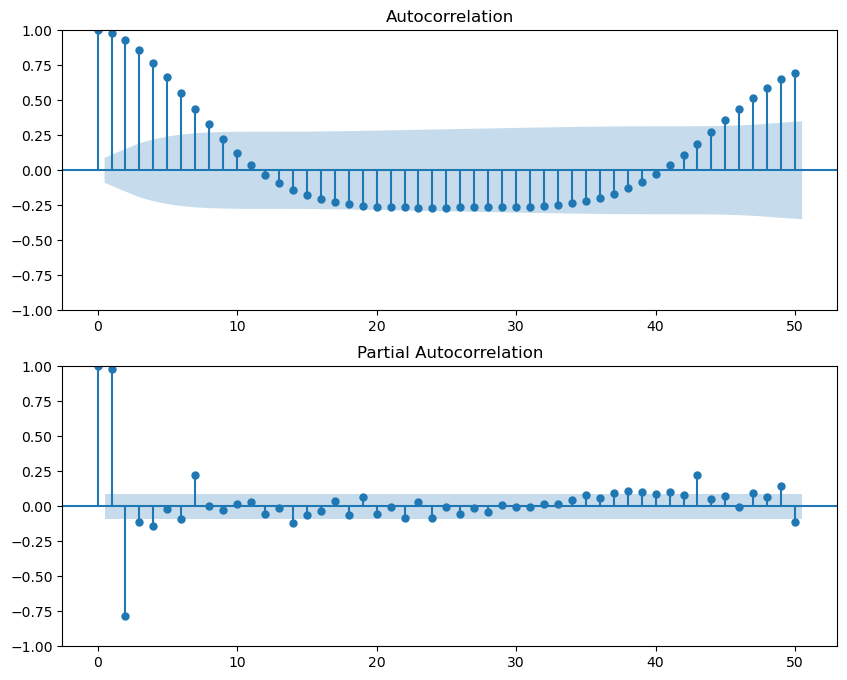

In [279]:
# Plot the time series
plt.plot(df.index, df['Positive'])
plt.xlabel('Date')
plt.ylabel('Influenza Positive Cases')
plt.show()

# Plot the autocorrelation and partial autocorrelation functions
fig, ax = plt.subplots(2,1,figsize=(10,8))
sm.graphics.tsa.plot_acf(df['Positive'], lags=50, ax=ax[0])
sm.graphics.tsa.plot_pacf(df['Positive'], lags=50, ax=ax[1])
plt.show()

### This dataset is going to be tuned first.

In [280]:
# Model Tuning using AutoArima
tunedmodel = pm.auto_arima(df, start_p=1, start_q=1, max_p=5, max_q=5, m=52, seasonal=True, d=None, 
                      trace=True, error_action='ignore', suppress_warnings=True, stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(1,0,1)[52] intercept   : AIC=8199.919, Time=6.62 sec
 ARIMA(0,1,0)(0,0,0)[52] intercept   : AIC=8788.871, Time=0.08 sec
 ARIMA(1,1,0)(1,0,0)[52] intercept   : AIC=8216.898, Time=5.79 sec
 ARIMA(0,1,1)(0,0,1)[52] intercept   : AIC=8391.211, Time=5.87 sec
 ARIMA(0,1,0)(0,0,0)[52]             : AIC=8787.233, Time=0.06 sec
 ARIMA(1,1,1)(0,0,1)[52] intercept   : AIC=8230.177, Time=2.66 sec
 ARIMA(1,1,1)(1,0,0)[52] intercept   : AIC=8218.370, Time=1.97 sec
 ARIMA(1,1,1)(2,0,1)[52] intercept   : AIC=8201.910, Time=34.28 sec
 ARIMA(1,1,1)(1,0,2)[52] intercept   : AIC=8201.910, Time=32.05 sec
 ARIMA(1,1,1)(0,0,0)[52] intercept   : AIC=8261.493, Time=0.18 sec
 ARIMA(1,1,1)(0,0,2)[52] intercept   : AIC=8219.614, Time=22.38 sec
 ARIMA(1,1,1)(2,0,0)[52] intercept   : AIC=8206.486, Time=24.69 sec
 ARIMA(1,1,1)(2,0,2)[52] intercept   : AIC=inf, Time=43.58 sec
 ARIMA(0,1,1)(1,0,1)[52] intercept   : AIC=8306.328, Time=8.87 sec
 ARIMA(1,1,0)(1,0,1

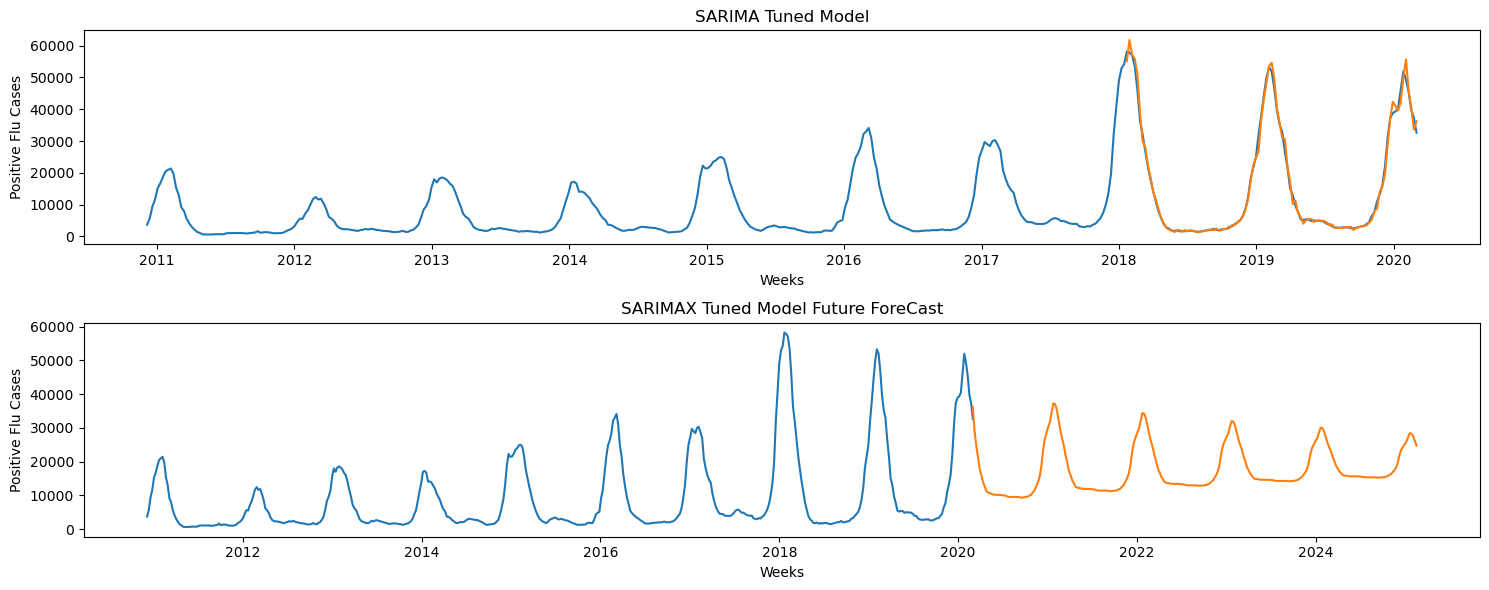

In [286]:
# fit a SARIMAX model using the optimal order parameters
model = sm.tsa.statespace.SARIMAX(df, order=tunedmodel.order, seasonal_order=tunedmodel.seasonal_order)
results = model.fit()
forecast = results.predict(start='2018-01-21 18:30:00+00:00', end='2020-03-01 18:30:00+00:00')
# plt.plot(df['Positive'])
# plt.plot(forecast)
# plt.show()
pl11 = df['Positive']
pl12 = forecast

# Creating a future dataset and testing
future_dates = [df.index[-1] + DateOffset(weeks=x) for x in range(0, 260)]
future_datest_df = pd.DataFrame(index = future_dates[1:], columns = df.columns)
fdf = pd.concat([df,future_datest_df])
fdf['Forecast'] = results.predict(start='2020-03-01 18:30:00+00:00', end='2025-02-16 18:30:00+00:00	')
pl21 = fdf[['Positive','Forecast']]
# fdf[['Positive','Forecast']].plot(figsize = (12,8))


fig, axs = plt.subplots(2,1, figsize = (15,6))
axs[0].plot(pl11)
axs[0].plot(pl12)
axs[0].set_title('SARIMA Tuned Model')
axs[0].set_xlabel('Weeks')
axs[0].set_ylabel('Positive Flu Cases')

axs[1].plot(pl21)
axs[1].set_title('SARIMAX Tuned Model Future ForeCast')
axs[1].set_xlabel('Weeks')
axs[1].set_ylabel('Positive Flu Cases')

fig.tight_layout()

In [287]:
from sklearn.metrics import mean_squared_error

# Assume 'df' is the original DataFrame with the time series data and 'forecast' is the predicted values of the test set.
test_start_date = '2018-01-21 18:30:00+00:00'
test_end_date = '2020-03-01 18:30:00+00:00'

# Split the original data into train and test sets
train_data = df.loc[:test_start_date]
test_data = df.loc[test_start_date:test_end_date]

# Create the ARIMA model using the tuned model orders
model = sm.tsa.statespace.SARIMAX(df, order=tunedmodel.order, seasonal_order=tunedmodel.seasonal_order)

# Fit the ARIMA model on the training data
results = model.fit()

# Generate the forecast for the test set
forecast = results.predict(start=test_start_date, end=test_end_date)

# Calculate the mean squared error of the forecasted values compared to the actual test set values
mse = mean_squared_error(test_data['Positive'], forecast)
# Calculate the root mean squared error (RMSE) of the forecasted values compared to the actual test set values
rmse = np.sqrt(mean_squared_error(test_data['Positive'], forecast))
# Calculate the mean absolute percentage error (MAPE) of the forecasted values compared to the actual test set values
mape = np.mean(np.abs((test_data['Positive'] - forecast) / test_data['Positive'])) * 100
# Calculate the root mean squared log error (RMSLE) of the forecasted values compared to the actual test set values
rmsle = np.sqrt(np.mean((np.log(forecast + 1) - np.log(test_data['Positive'] + 1))**2))

print("Mean Squared Error (MSE) of the SARIMAX model on test data:", mse)
print("Root Mean Squared Error (RMSE) of the SARIMAX model on test data:", rmse)
print("Mean Absolute Percentage Error (MAPE) of the SARIMAX model on test data:", mape)
print("Root Mean Squared Log Error (RMSLE) of the SARIMAX model on test data:", rmsle)

Mean Squared Error (MSE) of the SARIMAX model on test data: 2564043.0535631324
Root Mean Squared Error (RMSE) of the SARIMAX model on test data: 1601.2629557830694
Mean Absolute Percentage Error (MAPE) of the SARIMAX model on test data: 7.837775809363498
Root Mean Squared Log Error (RMSLE) of the SARIMAX model on test data: 0.10178371923341957


<a id="8"></a>
## Conclusion

[Back to Top](#100)

### Insights
- The Data from 2020-2023 does not follow similar patterns to earlier data.
- The Augmented Dickey-Fuller test showed the data is stationary. 
- The ARIMA/SARIMAX mdoels both require the time series to be non stationary, but the ADF test showed different. 
  The SARIMAX model was chosen as it can cater for seasonal non stationary data. 
- A different model like the LSTM need to be explored. 
- This model can serve as a preliminary forecasting model. 

### Metrics
 
- The mean squared error (MSE) of 2564043.0535631324 indicates the average of the squared differences between the predicted and actual values. The MSE is not in the original units of the data and therefore not directly interpretable on its own.

- The root mean squared error (RMSE) of 1601.2629557830694 is the square root of the MSE and is in the original units of the data. It represents the average difference between the predicted and actual values in the same units as the data.

- The mean absolute percentage error (MAPE) of 7.837775809363498 indicates the average percentage difference between the predicted and actual values. The MAPE is in percentage terms and is useful for evaluating the accuracy of a model when the scale of the data varies widely.

- The root mean squared log error (RMSLE) of 0.10178371923341957 measures the average percentage difference between the predicted and actual values in log-transformed space. The RMSLE is useful for evaluating the accuracy of a model when the data is highly skewed or when there are large differences between the magnitudes of the predicted and actual values.

- In general, the evaluation metrics should be considered in the context of the specific application and the variability of the data. However, it is worth noting that an RMSE of 1601.2629557830694 may be considered relatively high for a dataset with a maximum value of 60000, depending on the context. It is also worth noting that different applications may have different standards for what constitutes an "acceptable" level of error.

 <center> <d>&#9650;</d> <d>&#9644;</d> <d>&#9644;</d> <d>&#9672;</d> <d>&#9644;</d> <d>&#9644;</d><d>&#9644;</d> <d>&#9672;</d> <d>&#9644;</d> <d>&#9644;</d> <d>&#9644;</d> <d>&#9672;</d><d>&#9644;</d> <d>&#9644;</d> <d>&#9644;</d> <d>&#9672;</d> <d>&#9644;</d> <d>&#9644;</d><d>&#9644;</d> <d>&#9672;</d> <d>&#9644;</d> <d>&#9644;</d> <d>&#9644;</d> <d>&#9672;</d><d>&#9644;</d> <d>&#9644;</d> <d>&#9644;</d> <d>&#9672;</d> <d>&#9644;</d> <d>&#9644;</d><d>&#9644;</d> <d>&#9650;</d> </center>